# Animate trajectory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import mpl_toolkits.mplot3d.axes3d as p3
import os

In [2]:
from utils.distributions import Gaussian, GMM, GaussianFunnel, gen_ring

In [3]:
def gen(n):
    phi = 0
    while phi < 2 * np.pi:
        yield np.array([np.cos(phi), np.sin(phi), phi])
        phi += 2 * np.pi / n

In [4]:
def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

In [26]:
training_samples = np.load('./log_mog_tf/run91/run_info/training_samples.npy')

In [6]:
training_sample = training_samples[-1, :, 0, :].T
print(training_sample.shape)

(3, 2000)


In [27]:
ts = training_samples[-1, :, -1, :].T

In [28]:
#x_dim = 3
sigma = 0.05
means = np.array([[np.sqrt(2), 0.0, 0.0],
                  [0.0, np.sqrt(2), 0.0],
                  [np.sqrt(2), 0.0, 0.0]]).astype(np.float32)
cov_mtx = np.array([[sigma, 0.0, 0.0],
                    [0.0, sigma, 0.0],
                    [0.0, 0.0, sigma]]).astype(np.float32)
covs = np.array([cov_mtx, cov_mtx, cov_mtx]).astype(np.float32)
                
small_pi = 2E-16
big_pi = (1 - small_pi) / 2
distribution = GMM(means, covs, [big_pi, big_pi, small_pi])
#distribution = GMM(means, covs, [0.5, 0.5])
# Get some samples from the true distribution for debugging
init_samples = distribution.get_samples(1000)

<IPython.core.display.Javascript object>


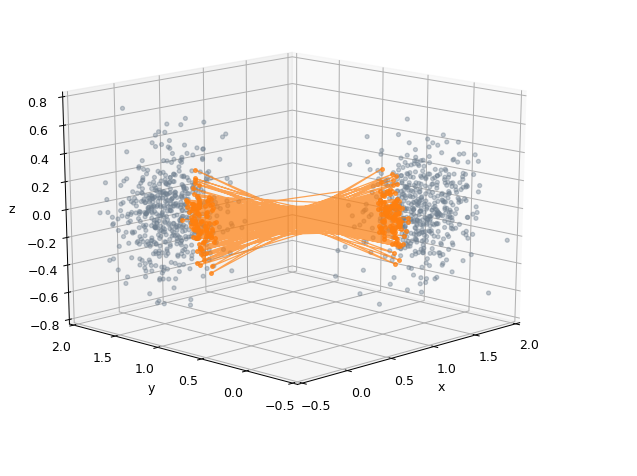

(-0.5, 2.0)

(-0.5, 2.0)

(-0.8, 0.8)

Text(0.5,0,'x')

Text(0.5,0,'y')

Text(0.5,0,'z')

In [31]:
%matplotlib notebook
fig = plt.figure()
ax = p3.Axes3D(fig)

N = 250
#data = np.array(list(gen(N))).T
#_data = training_sample[:, :N]
data1 = ts[:, :N]
ax.scatter(init_samples[:, 0], init_samples[:, 1], init_samples[:, 2],
           alpha=0.4, marker='o', s=10, color='slategrey')
line, = ax.plot(data1[0, 0:1], data1[1, 0:1], data1[2, 0:1], 
                alpha=0.7, color='C1', marker='o', markersize=3, ls='-', lw=1.)

#ax.plot(init_samples.T[:10, 0], training_sample.T[:10, 1], training_sample.T[:10, 2],
#           alpha=0.5, marker='o', color='C0')

ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.5, 2.0)
ax.set_zlim(-0.8, 0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ani = animation.FuncAnimation(fig, update, N, fargs=(data1, line), 
                              repeat=False, interval=10000/N, blit=False)
plt.show()

In [32]:
ani.save('./log_mog_tf/run91/MoG_trajectory_250t_32499train.gif', 
         writer='imagemagick')

In [ ]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(training_sample.T[:10, 0], training_sample.T[:10, 1], training_sample.T[:10, 2],
           alpha=0.5, marker='o', color='C0')
plt.show()